# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [9]:
import matplotlib.pyplot as pd
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('titanic.csv')
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(df.info())
print(df.describe()) #estatísticas descritivas
print(df['Sex'].value_counts()) #conta quantos de cada valor existem na coluna Sex.
print(df['Embarked'].value_counts()) #conta quantos de cada valor existem na coluna Embarked
print(df.isnull().sum()) #soma de valores nulos por coluna (útil para ver dados faltantes).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [13]:
df = df.drop_duplicates() #remove linhas duplicadas
df['Age'].fillna(df['Age'].median(), #preenche valores ausentes na coluna Age com a mediana dessa coluna
                 inplace=True)
df['Embarked'].fillna(df['Embarked'].mode() #preenche valores ausentes na coluna Embarked com o valor mais frequente
                      [0], inplace=True)
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone'], errors='ignore')
df['Survived'] = df['Survived'].astype(bool) #converte a coluna Survived para tipo booleano
print(df.isnull().sum()) #imprime novamente a soma de nulos por coluna


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\04876\AppData\Local\Temp\ipykernel_7728\881579389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), #preenche valores ausentes na coluna Age com a mediana dessa coluna
C:\Users\04876\AppData\Local\Temp\ipykernel_7728\881579389.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [24]:
# Criando nova coluna: Faixa etária
def categorize_age(age):
    if age < 18: return 'Criança'
    elif age < 60: return 'Adulto'
    else: return 'Idoso'
df['faixa_etaria'] = df['Age'].apply(categorize_age)
# Filtrando dados: Somente sobreviventes
Survivors = df[df['Survived'] == True]
print(Survivors.head())

   PassengerId  Survived  Pclass  \
1            2      True       1   
2            3      True       3   
3            4      True       1   
8            9      True       3   
9           10      True       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked faixa_etaria  
1      0          PC 17599  71.2833   C85        C       Adulto  
2      0  STON/O2. 3101282   7.9250   NaN        S       Adulto  
3      0            113803  53.1000  C123        S       Adulto  
8      2            347742  11.1333   NaN        S      

In [28]:
grouped = df.groupby(['Pclass', 'Sex']).agg({'Survived': 'mean', 'Age': 'mean', 'Fare': 'median'}).reset_index()
print(grouped)
print(df.sort_values(by='fare',
                     ascending=False).head())

   Pclass     Sex  Survived        Age      Fare
0       1  female  0.968085  33.978723  82.66455
1       1    male  0.368852  38.995246  41.26250
2       2  female  0.921053  28.703947  22.00000
3       2    male  0.157407  30.512315  13.00000
4       3  female  0.500000  23.572917  12.47500
5       3    male  0.135447  26.911873   7.92500


KeyError: 'fare'

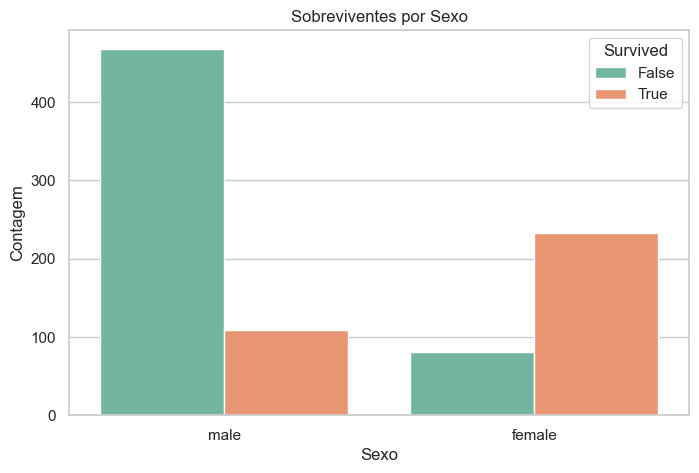

In [31]:
from matplotlib import pyplot as plt

# Configurando estilo do Seaborn
sns.set(style='whitegrid')

# Gráfico 1: Contagem de sobreviventes por sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex',
              hue='urvived', palette='Set2')
plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

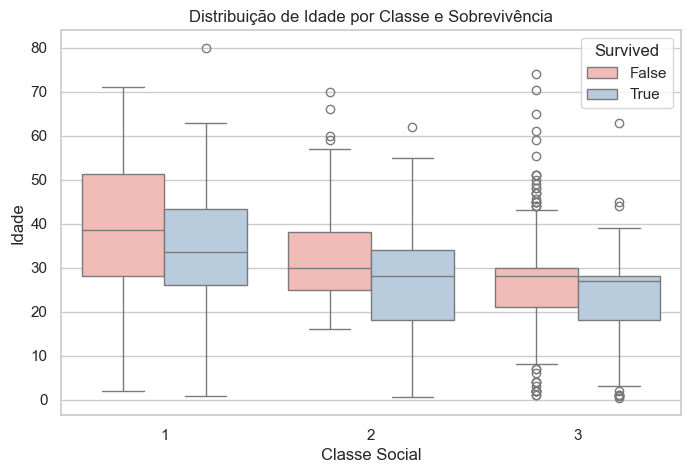

AttributeError: 'function' object has no attribute 'corr'

In [36]:
# Gráfico 2: Boxplot de idade por classe social e sobrevivência
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Pclass', y='Age',
            hue='Survived', palette='Pastel1')
plt.title('Distribuição de Idade por Classe e Sobrevivência')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()

# Gráfico 3: Mapa de calor de correlações
# (somente numéricos)
numeric_df = df.select_dtypes
df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlações')
plt.show()

# Gráfico 4: Pairplot para relações múltiplas
sns.pairplot(df, vars=['age', 'fare'],
             hue='survived', palette='husl')
plt.suptitle('Relações entre Idade, Tarifa e Sobrevivência')
plt.show()